In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install wordcloud

In [3]:
import os
import scipy as stats
# Importing nltk libraries
import nltk
import re
import string
from nltk import FreqDist
from nltk.corpus import wordnet
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# Defining different algorithms
from sklearn.svm import LinearSVC
# from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
# import dataset
df=pd.read_excel('flipkart_Ratings.xlsx')
df

,Review_title,Review_text,Ratings
0,Not suitable for work,\n It took me one month to get my laptop work...,2.0 out of 5 stars
1,Not worth for what you pay,\n You can buy the same for better price dire...,2.0 out of 5 stars
2,Good Product,\n Overall Product... upgraded windows 11 and...,2.0 out of 5 stars
3,Not advised,\n Theres a scratch already in the screen and...,2.0 out of 5 stars
4,"The laptop hangs, sometimes gets stuck and it ...",\n The laptop is slow sometimes get stuck and...,2.0 out of 5 stars
...,...,...,...
101123,Fair,Goods:\nThe picture quality is good.\nHeight a...,3
101124,Wonderful,Too much of back light bleeding.\nWorth the mo...,4
101125,Design looks very good,Design looks very good. fixed stand so no adju...,5
101126,Brilliant,I love product. Very nice working.,5


In [5]:
df=df.head(52225)

In [6]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52225 entries, 0 to 52224
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  43443 non-null  object
 1   Review_text   43615 non-null  object
 2   Ratings       43445 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


1. In our dataset we have 101128 rows and 3 columns.
2. All data is in object type data.
3. In our dataset null values are present.

In [7]:
# check null values
df.isnull().sum()

Review_title    8782
Review_text     8610
Ratings         8780
dtype: int64

Null values are present in dataset

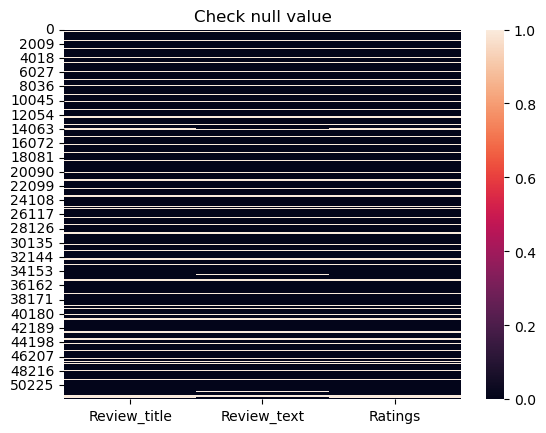

In [8]:
# check null values by plotting heatmap
sns.heatmap(df.isnull())
plt.title('Check null value')
plt.show()

In [9]:
df.isnull().any()

Review_title    True
Review_text     True
Ratings         True
dtype: bool

In [10]:
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['Null Values']
null['% of null values']=null['Null Values']*100/101128
null

,Null Values,% of null values
Review_title,8782,8.684044
Review_text,8610,8.513963
Ratings,8780,8.682066


# Fill null values by mode technique

In [11]:
for i in df.columns:
    print(f"In {i} highest value is : {df[i].mode()}")
    print('\n')

In Review_title highest value is : 0    Good
Name: Review_title, dtype: object


In Review_text highest value is : 0    \n  Good\n
Name: Review_text, dtype: object


In Ratings highest value is : 0    5.0 out of 5 stars
Name: Ratings, dtype: object




In [12]:
col=df.columns
for i in range(0,len(col)):
    if df[col[i]].dtype=="object":
        df[col[i]].fillna(df[col[i]].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

now no null values are present in dataset

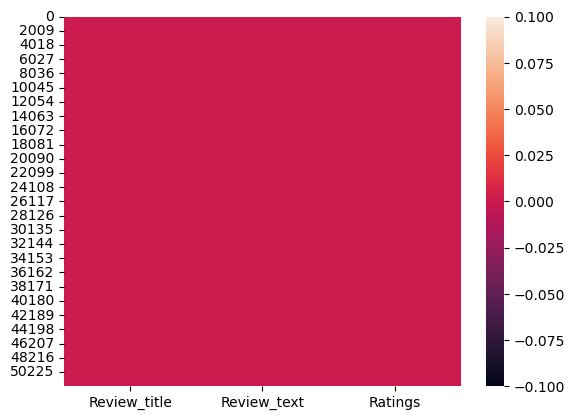

In [14]:
# now plot heatmap after apply imputation method
sns.heatmap(df.isnull())
plt.show()

we cleary see that no null values are present in our dataset

In [15]:
# checking unique values in dataset
df.nunique().to_frame('No. of unique values')

,No. of unique values
Review_title,27818
Review_text,33884
Ratings,5


Number of unique values in dataset

In [16]:
# checking values count in dataset
for i in df.columns:
    print(df[i].value_counts())
    print('******')

Good                                                            9459
Value for money                                                  388
Good product                                                     310
Nice                                                             179
Average                                                          164
                                                                ... 
Worest product. don't buy                                          1
Very low quality, not good customer dealing of sales person.       1
Noise cancellation is worst                                        1
Not interested this product is not working and not useful          1
LG true gaming Monitor                                             1
Name: Review_title, Length: 27818, dtype: int64
******
\n  Good\n                                                                                      8888
\n  Good product\n                                                                   

In [17]:
# Replacing duplicated values in raing columns
df['Ratings']=df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings']=df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings']=df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings']=df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings']=df['Ratings'].replace('5.0 out of 5 stars',5)

In [18]:
# checking values in review column after replacing unwanted data
df['Ratings'].value_counts()

5    19099
1     9399
4     9110
3     7721
2     6896
Name: Ratings, dtype: int64

Now we converted all duplicated values in ratings columns

In [19]:
# change type of Ratings columns
df['Ratings']=df['Ratings'].astype('int')

In [20]:
# check dtypes of Rating Columns
df['Ratings'].dtype

dtype('int32')

Now we convert all object type data into int type of Rating columns

In [21]:
df

,Review_title,Review_text,Ratings
0,Not suitable for work,\n It took me one month to get my laptop work...,2
1,Not worth for what you pay,\n You can buy the same for better price dire...,2
2,Good Product,\n Overall Product... upgraded windows 11 and...,2
3,Not advised,\n Theres a scratch already in the screen and...,2
4,"The laptop hangs, sometimes gets stuck and it ...",\n The laptop is slow sometimes get stuck and...,2
...,...,...,...
52220,Paisa wasool product,\n Full paisa wasool product🤑🤑\n,4
52221,Good product for this price range go for it,\n Good product\n,4
52222,Super,\n Super\n,4
52223,LG true gaming Monitor,\n Great Product by LG\n,4


# Now merge Review_title and Review_text for better result

In [22]:
df['Total_review']=df['Review_title'] + df['Review_text']

In [23]:
df

,Review_title,Review_text,Ratings,Total_review
0,Not suitable for work,\n It took me one month to get my laptop work...,2,Not suitable for work\n It took me one month ...
1,Not worth for what you pay,\n You can buy the same for better price dire...,2,Not worth for what you pay\n You can buy the ...
2,Good Product,\n Overall Product... upgraded windows 11 and...,2,Good Product\n Overall Product... upgraded wi...
3,Not advised,\n Theres a scratch already in the screen and...,2,Not advised\n Theres a scratch already in the...
4,"The laptop hangs, sometimes gets stuck and it ...",\n The laptop is slow sometimes get stuck and...,2,"The laptop hangs, sometimes gets stuck and it ..."
...,...,...,...,...
52220,Paisa wasool product,\n Full paisa wasool product🤑🤑\n,4,Paisa wasool product\n Full paisa wasool pro...
52221,Good product for this price range go for it,\n Good product\n,4,Good product for this price range go for it\n ...
52222,Super,\n Super\n,4,Super\n Super\n
52223,LG true gaming Monitor,\n Great Product by LG\n,4,LG true gaming Monitor\n Great Product by LG\n


Now remove Review title and Review text bcoz we make new column od Total review

In [24]:
# drop review text and review title
df.drop(['Review_title','Review_text'],axis=1,inplace=True)

In [25]:
df

,Ratings,Total_review
0,2,Not suitable for work\n It took me one month ...
1,2,Not worth for what you pay\n You can buy the ...
2,2,Good Product\n Overall Product... upgraded wi...
3,2,Not advised\n Theres a scratch already in the...
4,2,"The laptop hangs, sometimes gets stuck and it ..."
...,...,...
52220,4,Paisa wasool product\n Full paisa wasool pro...
52221,4,Good product for this price range go for it\n ...
52222,4,Super\n Super\n
52223,4,LG true gaming Monitor\n Great Product by LG\n


# Text Preprocessing
Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the following steps, but these will be performed in a slightly different manner:

1. Text case conversion
2. Removing Punctuations and other special characters
3. Splitting the comments into individual words
4. Removing Stop Words
5. Stemming and Lemmatization
6. Text Standardization-Normalization
7. Splitting dataset into Training and Testing

In [26]:
# creating a lenth columns for Review
df['Length']=df['Total_review'].str.len()
df

,Ratings,Total_review,Length
0,2,Not suitable for work\n It took me one month ...,409
1,2,Not worth for what you pay\n You can buy the ...,440
2,2,Good Product\n Overall Product... upgraded wi...,105
3,2,Not advised\n Theres a scratch already in the...,146
4,2,"The laptop hangs, sometimes gets stuck and it ...",370
...,...,...,...
52220,4,Paisa wasool product\n Full paisa wasool pro...,52
52221,4,Good product for this price range go for it\n ...,59
52222,4,Super\n Super\n,14
52223,4,LG true gaming Monitor\n Great Product by LG\n,45


I have created new column "Length" which contains the length of the Review text.

The string library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count functions we have seen that our Review feature contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as ' in escape sequence notation is replaced by empty character in the punctuation string.

In [27]:
# Defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"", " ", text)
    text = re.sub(r'http\S+', '', text) # Removing urls
    return text

In [28]:
# Removing punctuations
df['Total_review'] = df['Total_review'].str.replace(r'[^\w\d\s]', ' ')

Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words/tokens. It is better to perform lower case the text as the first step in this text preprocessing. Because if we are trying to remove stop words all words need to be in lower case.

In [29]:
df

,Ratings,Total_review,Length
0,2,Not suitable for work\n It took me one month ...,409
1,2,Not worth for what you pay\n You can buy the ...,440
2,2,Good Product\n Overall Product upgraded wi...,105
3,2,Not advised\n Theres a scratch already in the...,146
4,2,The laptop hangs sometimes gets stuck and it ...,370
...,...,...,...
52220,4,Paisa wasool product\n Full paisa wasool pro...,52
52221,4,Good product for this price range go for it\n ...,59
52222,4,Super\n Super\n,14
52223,4,LG true gaming Monitor\n Great Product by LG\n,45


In [30]:
# Convert all comment texts to lower case in dataset
df['Total_review'] = df['Total_review'].apply(lambda x : x.lower())

df['Total_review'] = df['Total_review'].apply(lambda x : decontracted(x))

In [31]:
# Replacing '\n' in Review
df['Total_review'] = df['Total_review'].replace('\n',' ')

# Removing Stopwords
Stopwords are common words and irrelevant words from which we can't get any useful information for our model or problem statement.

Few stopwords are "a", "an", "the", etc. Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

In [32]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df["Total_review"] = df["Total_review"].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

# Stemming and Lemmatization
1. Stemming is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.
2. Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [33]:
# Defining function to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [34]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [35]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [36]:
df['Total_review'] = df['Total_review'].apply(lambda x : lemmatize_sentence(x))

# Text Normalization-Standardization

In [37]:
# Removing noise data from the text
def noise_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ASCII and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

In [38]:
df['Total_review'] = df['Total_review'].apply(lambda x : noise_words(x))

I have defined a function noise_words for removing the noise from the text. It will remove any html markups, digits,urls and white spaces from the text. Let's have a look at first two rows of the text from review column to understand it.

In [39]:
df['Total_review'][0]

'n b l e f r w r k k e n e n h g e l p p w r k n g r e q r e e n h e l p p c e w h n l e n n h e f f c e l k n h e r p p n e e e f r b n e b e b g h n e x p e n v e e c n l n n l e n v h p h e l p c n f g r e h e l p p e v e r n e n n r n e r v c e f w r r n l p p n l h g e r w b c k w h h c h e n e l l n e'

In [40]:
df['Total_review'][1]

'n w r h f r w h p c n b h e e f r b e e r p r c e r e c l n l e n v e h n h e r e w e n n e l e e e l b l e r r e l e h e p r c e c h e p e r n l e n v e n c l q b r n l e n v h e   e l f e p e c f c n c h c h e p e r b r w h  p c e r h e v e q l v e r p r n e x p e c c h h n g f r z n w h e r e e n n e l e e e l n p r c e l l c p r v e l h g h e r'

# Count of words in the text

In [41]:
# Creating column for word counts in the text
df['Review_word_count'] = df['Total_review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_word_count','Total_review']].head()

,Review_word_count,Total_review
0,154,n b l e f r w r k k e n e n h g e l p p w r k ...
1,177,n w r h f r w h p c n b h e e f r b e e r p r ...
2,45,g p r c v e r l l p r c p g r e w n w n f c ...
3,60,n v e h e r e c r c h l r e n h e c r e e n n ...
4,116,h e l p p h n g e e g e c k n n r e p n n g e ...


In [42]:
# New column (clean_length) after removing punctuations, stopwords in dataset
df['clean_length'] =df.Total_review.str.len()
df

,Ratings,Total_review,Length,Review_word_count,clean_length
0,2,n b l e f r w r k k e n e n h g e l p p w r k ...,409,154,307
1,2,n w r h f r w h p c n b h e e f r b e e r p r ...,440,177,350
2,2,g p r c v e r l l p r c p g r e w n w n f c ...,105,45,87
3,2,n v e h e r e c r c h l r e n h e c r e e n n ...,146,60,119
4,2,h e l p p h n g e e g e c k n n r e p n n g e ...,370,116,231
...,...,...,...,...,...
52220,4,p w l p r c f l l p w l p r c,52,15,29
52221,4,g p r c f r h p r c e r n g e g f r g p r c,59,22,43
52222,4,p e r p e r,14,6,11
52223,4,l g r e g n g n r g r e p r c b l g,45,18,35


I have created new column "clean_length" in dataset after cleaning the data. We can see that nearly half of the text has been removed from the Review after using required pre-processing.

In [43]:
# Total length removal in data
print('Original Length:',df.Length.sum())
print('Clean Length:',df.clean_length.sum())
print("Total Words Removed:", (df.Length.sum()) - (df.clean_length.sum()))

Original Length: 14951382
Clean Length: 11437699
Total Words Removed: 3513683


In [44]:
# Statistical summary of dataset
df.describe()

,Ratings,Length,Review_word_count,clean_length
count,52225.000000,52225.000000,52225.000000,52225.000000
mean,3.413863,286.287831,111.026482,219.008119
std,1.522482,356.235362,141.397490,279.080176
min,1.000000,6.000000,1.000000,0.000000
25%,2.000000,58.000000,22.000000,43.000000
50%,4.000000,202.000000,78.000000,153.000000
75%,5.000000,387.000000,151.000000,298.000000
max,5.000000,12753.000000,5225.000000,9822.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

The counts of every column is same which means there are no missing values present in the dataset.
The mean value is greater than the median in all the columns except the target column Ratings. So, the data in these columns are skewed to right and in target it is skewed to left.
There is a huge difference between 75% percentile and max values so, we can say there are some outliers present in the data. Since Review_length Review_word_count and clean_length columns are continuous numerical columns, we need to remove skewness and outliers in these columns except target column.

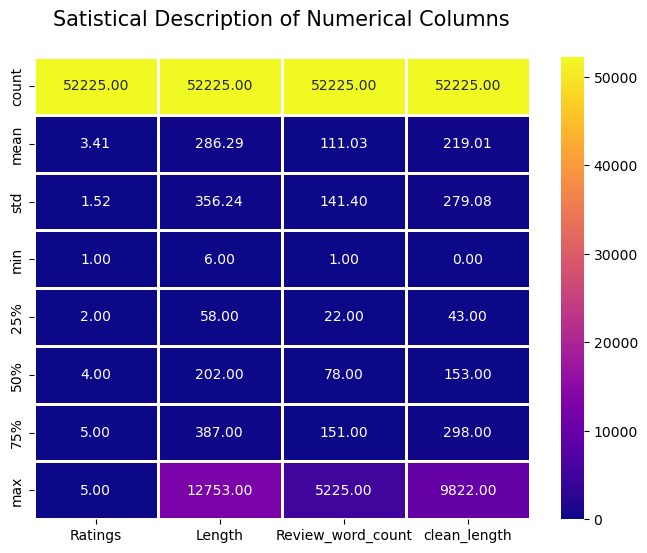

In [45]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (8,6))
sns.heatmap(round(df.describe(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="plasma")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

# Visualizations

5    19099
1     9399
4     9110
3     7721
2     6896
Name: Ratings, dtype: int64


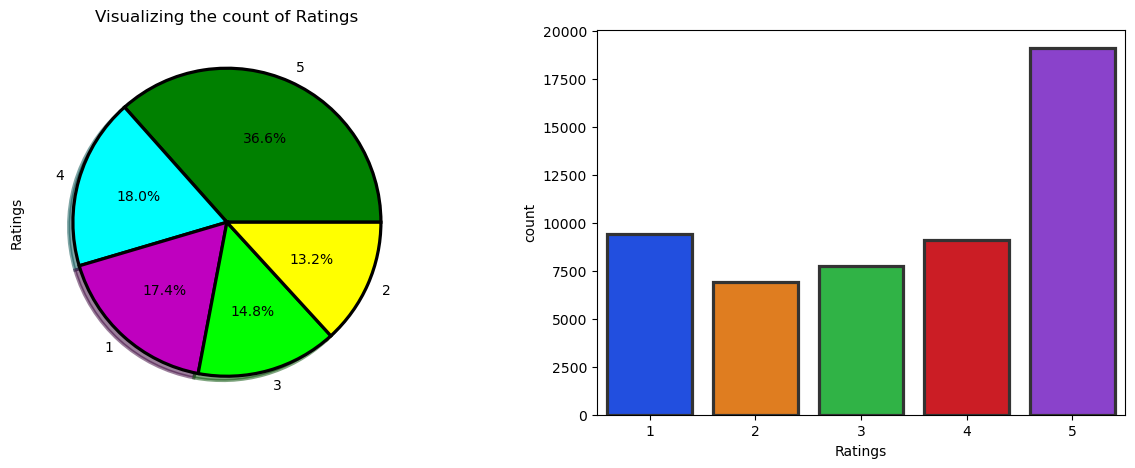

In [46]:
# Visualizing the target variable
print(df['Ratings'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['5', '4', '1', '3', '2']
colors = ["green", "cyan", "m", "lime", "yellow"]
df['Ratings'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of Ratings')
ax = sns.countplot('Ratings', data=df, ax=ax[1],palette="bright",linewidth=2.3, edgecolor=".2")
plt.show()

1. Looking at the above pie chart and count plot for our target variable "Ratings" we can say that the dataset contains the more review text rated as 5 star compared to other review ratings and very less reviews rated as 2 compared to others.
2. Around 44% of the texts are rated as 5 and only 10% of the texts rated as 2 stars.
So, we can say that there is "imbalance problem" which we need to make it balance to build our model.

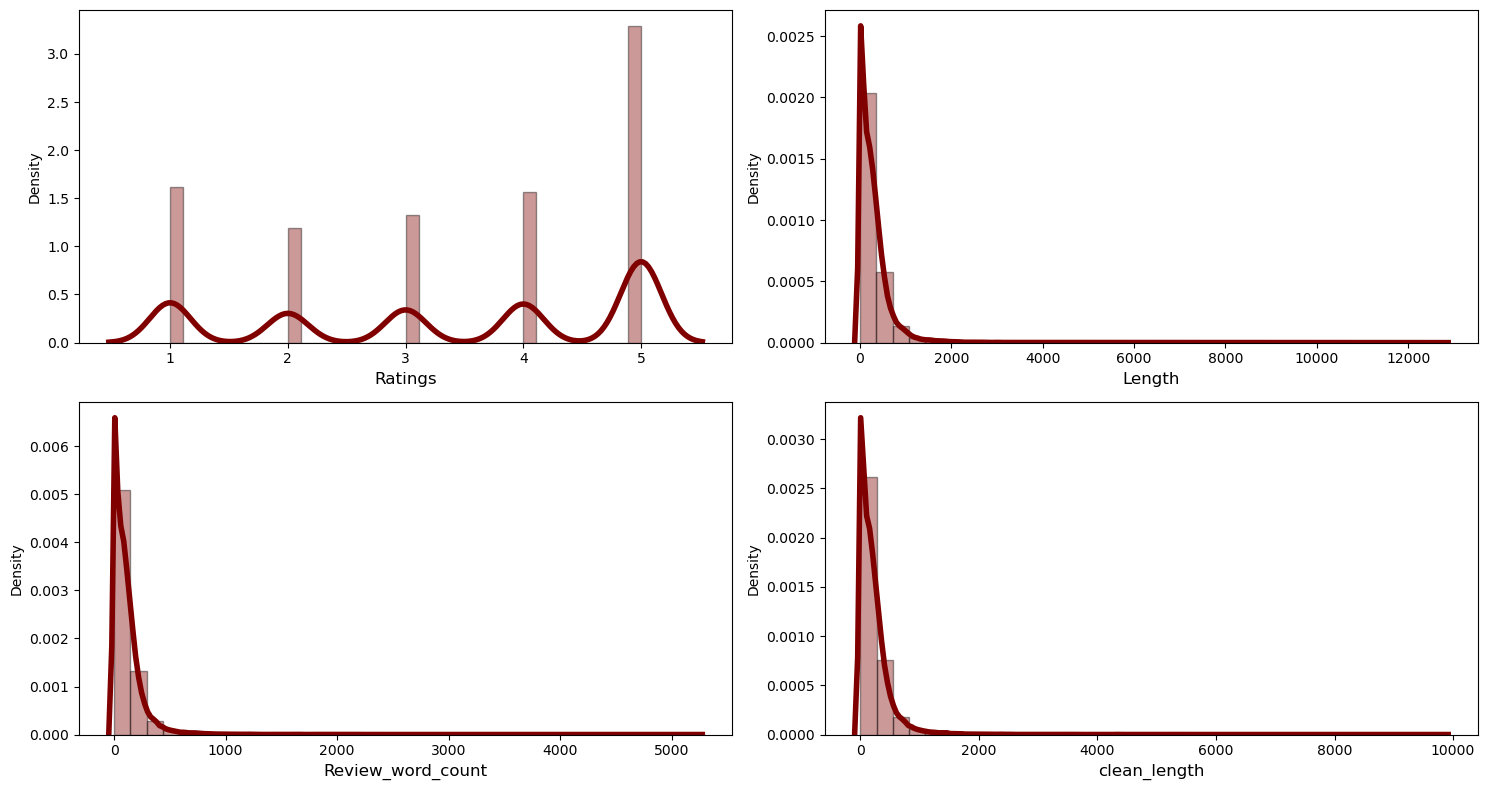

In [47]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","Length","Review_word_count","clean_length"]
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

1. From the dist plot we can notice that data in all the columns are skewed to right except the target column. Which means the mean value is greater than the median in these columns.
2. From the histogram of Review_word_count we can clearly observe that most of our text is having the number of words in the range of 0 to 200, and some of the text are too lengthy which are out of range which acts as outliers in our data.
3. Also, the plot of clean_length also quite similar to the histogram of Review_word_count.
4. Since there is skewness in the data we need to remove it before building the machine learning models.

# Check outliers

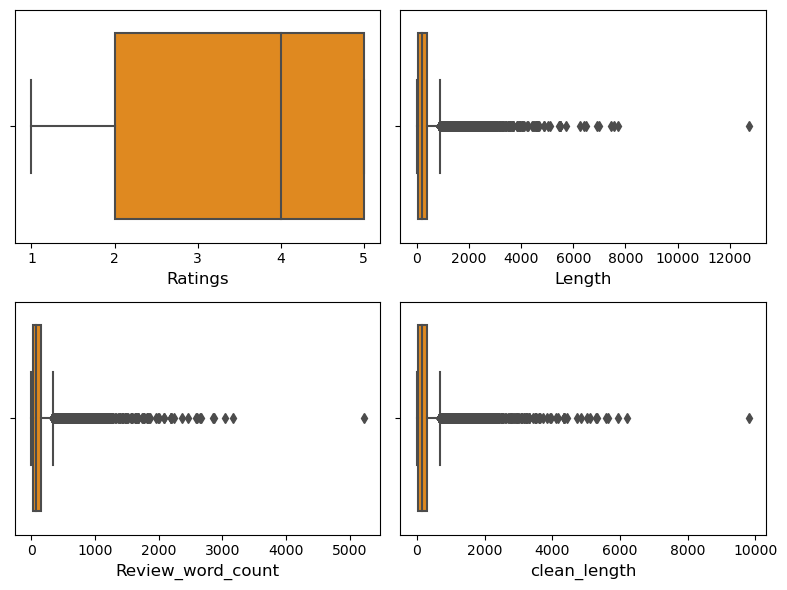

In [48]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","Length","Review_word_count","clean_length"]
plt.figure(figsize=(8,6),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Removing outliers

In [49]:
df.dtypes

Ratings               int32
Total_review         object
Length                int64
Review_word_count     int64
clean_length          int64
dtype: object

### Zscore method

In [50]:
# Features containing outliers
features = df[['Length', 'Review_word_count', 'clean_length']]
               
# Using zscore to remove outliers               
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,Length,Review_word_count,clean_length
0,0.344473,0.303923,0.315296
1,0.431495,0.466586,0.469375
2,0.508904,0.466961,0.473016
3,0.393810,0.360876,0.358352
4,0.234993,0.035174,0.042970
...,...,...,...
52220,0.657683,0.679131,0.680844
52221,0.638033,0.629625,0.630678
52222,0.764355,0.742782,0.745342
52223,0.677333,0.657914,0.659344


In [51]:
# Creating new dataframe by setting z to 3
new_df = df[(z<3).all(axis=1)] 
new_df

,Ratings,Total_review,Length,Review_word_count,clean_length
0,2,n b l e f r w r k k e n e n h g e l p p w r k ...,409,154,307
1,2,n w r h f r w h p c n b h e e f r b e e r p r ...,440,177,350
2,2,g p r c v e r l l p r c p g r e w n w n f c ...,105,45,87
3,2,n v e h e r e c r c h l r e n h e c r e e n n ...,146,60,119
4,2,h e l p p h n g e e g e c k n n r e p n n g e ...,370,116,231
...,...,...,...,...,...
52220,4,p w l p r c f l l p w l p r c,52,15,29
52221,4,g p r c f r h p r c e r n g e g f r g p r c,59,22,43
52222,4,p e r p e r,14,6,11
52223,4,l g r e g n g n r g r e p r c b l g,45,18,35


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [52]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (52225, 5)
Shape of dataset after removing outliers: (51369, 5)


In [53]:
# Checking the the data loss after removing outliers
data_loss = (101128-99603)/101128*100
data_loss

1.5079898742188118

The acceptable range of data loss is 10%. By using Zscore I am losing around 1.58% of data which is acceptable. Let's try to remove outliers using IQR method.

# IQR (Inter Quartile Range) method

In [54]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (2616, 5)


In [56]:
# Checking the the data loss after removing outliers
data_loss = (101128-96640)/101128*100
data_loss

4.437940036389526

By using IQR method, I am losing around 5% of data which is more compared to Zscore methods. So, considering Zscore method as the data loss is very less using this method.

# Checking for skewness in dataset

In [57]:
# Checking the skewness
new_df.skew()

Ratings             -0.395172
Length               1.405718
Review_word_count    1.409116
clean_length         1.403775
dtype: float64

Here we can observe the skewness present in all the columns. But Ratings column is our target and it has categorical data so no need to remove skewness in this column. Let's remove skewness in the remaining columns using yeo-johnson method.

# Removing skewness using yeo-johnson method

In [58]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['Length', 'Review_word_count', 'clean_length']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [59]:
col=df.columns
for i in range(0,len(col)):
    if df[col[i]].dtype=="object":
        df[col[i]].fillna(df[col[i]].mode()[0],inplace=True)

In [60]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features]

,Length,Review_word_count,clean_length
0,0.832928,0.788306,0.793246
1,0.910706,0.933808,0.928881
2,-0.365422,-0.258513,-0.257292
3,-0.114350,-0.048424,-0.034748
4,0.728714,0.510663,0.517799
...,...,...,...
52220,-0.829969,-0.903088,-0.879616
52221,-0.753058,-0.704380,-0.682064
52222,-1.482605,-1.281983,-1.265241
52223,-0.914711,-0.811708,-0.788566


In [61]:
# Checking skewness after using yeo-johnson method
new_df[features].skew()

Length              -0.130388
Review_word_count   -0.165676
clean_length        -0.193571
dtype: float64

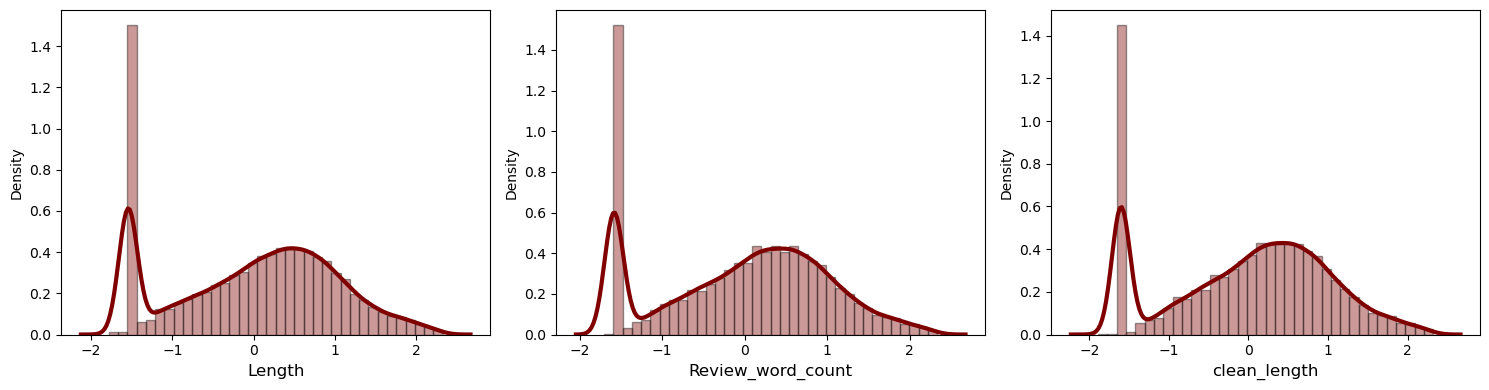

In [62]:
# Checking how the data has been distriubted in each column 
col = ["Length","Review_word_count","clean_length"]
plt.figure(figsize=(15,4),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(new_df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':3})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Checking for correlation in dataset

In [63]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Ratings,Length,Review_word_count,clean_length
Ratings,1.000000,-0.309009,-0.317314,-0.321395
Length,-0.309009,1.000000,0.996613,0.996230
Review_word_count,-0.317314,0.996613,1.000000,0.999871
clean_length,-0.321395,0.996230,0.999871,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

# Visualizing the correlation matrix by plotting heat map.

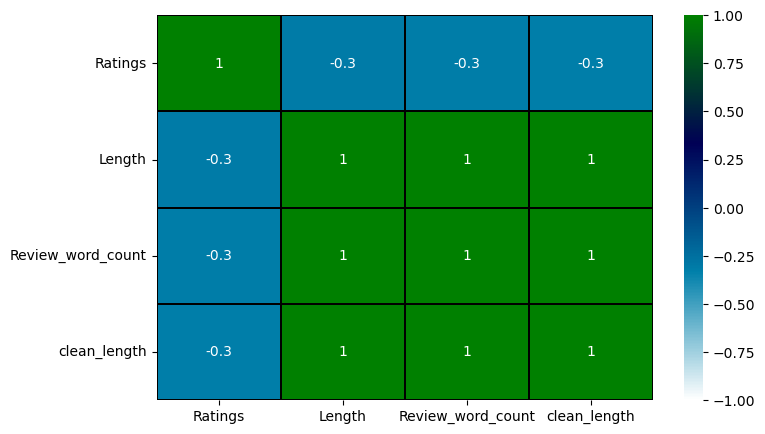

In [64]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(8,5))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean_r",
            annot_kws={'size':10})
plt.yticks(rotation=0);

1. The heat map gives the correlation between features and label. We can also observe the correlation between one feature to another.
2. From the map we can notice length of the words are correlated with each other. All the features are negatively correlated with the label "Ratings".
3. I have successfully completed cleaning the data. Let's use TF-IDF vactorizer, it'll help to transform the text data to feature vector which can be used as input in our modelling. It is a common algorithm to transform text into numbers. It measures the originality of a word by comparing the frequency of appearance of a word in a document with the number of documents the words appear in.

# Separating features and label into X and y

In [65]:
# Separating features and labels
x = df['Total_review']
y = df['Ratings']

# Converting tokens into vectors for moving forward to build machine learning model.

In [66]:
# Using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                strip_accents = 'unicode',
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [67]:
# Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [68]:
# I will combine both word vectors and character vectors as input for our model
X = hstack([train_char_features,train_word_features])

# Machine Learning Model Building and Evaluation Metrics

### Finding Best Random State

In [69]:
# Determining Best Random State
SVC=LinearSVC()
max_score=0
for r_state in range (20,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.20)
    SVC.fit(x_train,y_train)
    pred=SVC.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    if acc_score>max_score:
        max_score=acc_score
        final_r_state=r_state
print("The maximum accuracy score", max_score, "is achieved at", final_r_state)

The maximum accuracy score 0.6190521780756343 is achieved at 95


With the help of random state selection process we have found our random state to be 77 with best accuracy as 68.35%.

# Splitting train and test data

In [70]:
# Splitting training and testing data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=95)

I am taking 30% of the complete dataset for training purpose and the remaining 70% be used to train the machine learning models using the random state 67.

In [71]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(41780, 47737) 	 (10445, 47737)
(41780,) 	 (10445,)


# Balancing data using oversampling technique

In [72]:
# Let's check the number of classes before fit
from collections import Counter
print("Count of classes before fit {}".format(Counter(y_train)))

Count of classes before fit Counter({5: 15182, 1: 7487, 4: 7371, 3: 6241, 2: 5499})


Here we have the maximum count 31014 for rating 5, I am using this count to get the balanced data ensuring all the entries to be having the same count of 31014.

In [73]:
# Creating instances for different Classifiers

SVC = LinearSVC()
SGD = SGDClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XT = ExtraTreesClassifier()

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LinearSVC',SVC))
models.append(('SGDClassifier',SGD))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('XT = ExtraTreesClassifier',XT))

In [74]:
# Creating empty lists
Model = []
Acc_score = []
cvs = []

for name,model in models:
    print("******************************",name,"******************************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))

****************************** LinearSVC ******************************


LinearSVC()
Accuracy_Score:  61.90521780756343
Cross Validation Score:  54.320727620871224
Confusion matrix: 

[[1408  201  128   74  101]
 [ 432  511  238  120   96]
 [ 237  199  539  300  205]
 [  99   87  180  774  599]
 [ 108   62  112  401 3234]]


Classification Report:
 
              precision    recall  f1-score   support

           1       0.62      0.74      0.67      1912
           2       0.48      0.37      0.42      1397
           3       0.45      0.36      0.40      1480
           4       0.46      0.45      0.45      1739
           5       0.76      0.83      0.79      3917

    accuracy                           0.62     10445
   macro avg       0.56      0.55      0.55     10445
weighted avg       0.60      0.62      0.61     10445

****************************** SGDClassifier ******************************


SGDClassifier()
Accuracy_Score:  57.83628530397319
Cross Validation Score:  54.3

# Model Selection

In [75]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,
                      'Cross Validation Score':cvs}) 
Results

,Model,Accuracy Score,Cross Validation Score
0,LinearSVC,61.905218,54.320728
1,SGDClassifier,57.836285,54.376257
2,DecisionTreeClassifier,57.951173,49.056965
3,RandomForestClassifier,64.825275,56.402106
4,XT = ExtraTreesClassifier,64.643370,56.224031


After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for Random Forest Classifier. On this basis I can conclude that Eandom Forest Classifier as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.

Hyper Parameter Tuning

In [76]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [77]:
Gs=GridSearchCV(RFC,dict1,cv=5)
Gs

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
Gs.fit(x_train,y_train)

In [ ]:
Gs.best_params_

In [ ]:
Gs.best_score_

In [ ]:
Gs.best_estimator_

# Analysis with full model

In [ ]:
Rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=300,max_depth=7)
Rf.fit(x_train,y_train)
pred_test=Rf.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(Rf.score(x_train,y_train))*100}")

# Save the best model

In [ ]:
import joblib

In [ ]:
joblib.dump(Gs.best_estimator_,'Review_prediction.pkl')

# Loading and Predicting the Saved Model

In [ ]:
# loading the final model
model = joblib.load('Review_Prediction(IP7).pkl')

# Creating dataframe for predicted results
prediction=pd.DataFrame([model.predict(X)[:]],index=["Predicted"])
prediction.T
